In [1]:
from main import import_data, hist_keys, scatter_grid
import pandas as pd
import matplotlib.pyplot as plt

data = import_data()

# Exclusively contains plots from the last task
# This was moved to this separate notebook for preservation,
# should anything here become relevant again.

In [3]:
final_scores = data["merged"][data["merged"]["Final Score"] > 0]
only_successes = final_scores.query("SUCCESS")
simplified = only_successes[["GROUP", "Final Score"]]

# final score per group
group_scores = simplified.drop_duplicates()

# total successes per group
total_success = simplified.groupby("GROUP").count()

# total solo successes
solo_success = simplified[only_successes["Area"] == only_successes["PLAYERAREA"]] \
    .groupby("GROUP").count()

solo_part = solo_success / total_success

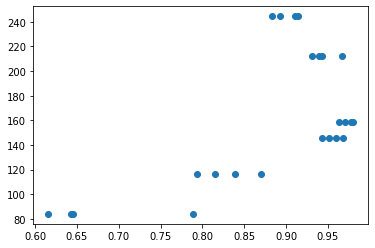

In [9]:
# A attempt to gain insight into the role of cooperative play on single players final scores.
# No clear trend merged, although there may be some positive interaction with score.
# (shouldn't be that surprising as the metric used is the ratio of successful coop plays, not total ons)

clean_score = data["merged"]["Final Score"] > 0
d = data["merged"][["Area", "PLAYERAREA", "SUCCESS", "VPCode", "GROUP", "Final Score", "Score"]]
d = d[clean_score]

coop_plays = d["Area"] != d["PLAYERAREA"]
mean_coop_success = d[coop_plays][["VPCode", "SUCCESS"]].groupby("VPCode").mean()["SUCCESS"]
player_final_scores = d[coop_plays][["VPCode", "Final Score"]].drop_duplicates().groupby("VPCode").mean()["Final Score"]

plt.scatter(mean_coop_success, player_final_scores)
plt.show()

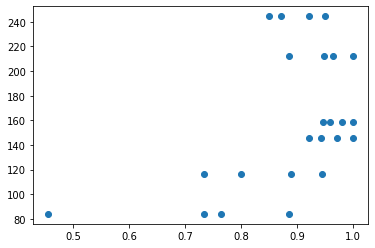

In [13]:
# similar plot, but plots the rate of solo play successes against player score
mean_solo_success = d[~coop_plays][["VPCode", "SUCCESS"]].groupby("VPCode").mean()["SUCCESS"]
plt.scatter(mean_solo_success, player_final_scores)
plt.show()

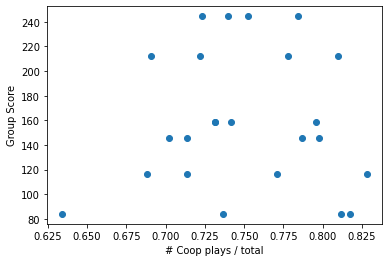

In [14]:
# Here we plot the ratio of a players total coop plays against their score
# Results are fairly fuzzy and no clear trend emerges

coops = d[coop_plays].groupby("VPCode").size()
total = d.groupby("VPCode").size()
coop_ratio = coops / total
plt.scatter(coop_ratio, player_final_scores, label="Coop")
plt.xlabel("# Coop plays / total")
plt.ylabel("Group Score")
plt.show()

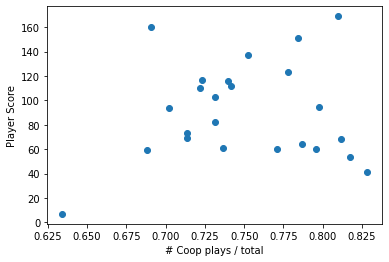

In [16]:
# The same for group scores
scores = d[["VPCode", "Score"]].drop_duplicates()["Score"]

plt.scatter(coop_ratio, scores, label="Solo")
plt.xlabel("# Coop plays / total")
plt.ylabel("Player Score")
plt.show()